# Julia 1.3

https://docs.julialang.org/en/v1.3/NEWS/#

In [1]:
VERSION

v"1.3.1"

In [8]:
ENV["JULIA_PROJECT"] = "/home/user/"

KeyError: KeyError: key "JULIA_PROJECT" not found

In [2]:
println("Hello 1.3")

Hello 1.3


In [4]:
using NLopt

ArgumentError: ArgumentError: Package NLopt not found in current path:
- Run `import Pkg; Pkg.add("NLopt")` to install the NLopt package.


In [3]:
using PyCall
# pygui(true)
using PyPlot


import Random:seed!; seed!(99)

import LinearAlgebra:norm

function activate(x,W,b)
    return 1 ./ (1 .+ exp.(-(W*x+b)))
end

x1 = [0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7]
x2 = [0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6]
y = [ones(1,5) zeros(1,5) ; zeros(1,5) ones(1,5)]

W2 = 0.5*randn(2,2); W3 = 0.5*randn(3,2); W4 = 0.5*randn(2,3);
b2 = 0.5*randn(2,1); b3 = 0.5*randn(3,1); b4 = 0.5*randn(2,1);

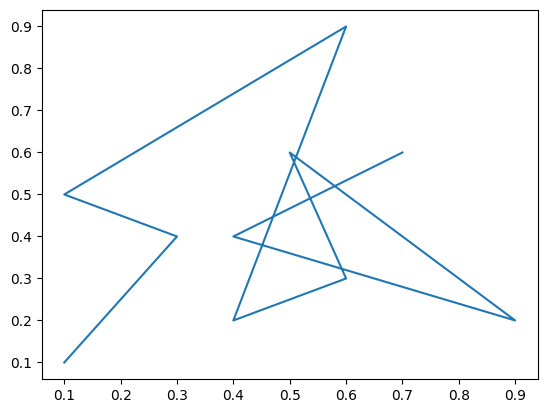

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcdf6f871d0>

In [4]:
PyPlot.plot(x1, x2)

In [5]:
using Pkg

In [6]:
for i = 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


In [7]:
# Import libraries.
using Turing, StatsPlots, Random

# Set the true probability of heads in a coin.
p_true = 0.5

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100;

# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns))

# Declare our Turing model.
@model coinflip(y) = begin
    # Our prior belief about the probability of heads in a coin.
    p ~ Beta(1, 1)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Bernoulli(p)
    end
end;

# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(data), HMC(ϵ, τ), iterations);

# Plot a summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
histogram(chain[:p])

InterruptException: InterruptException:

In [0]:
using Compat

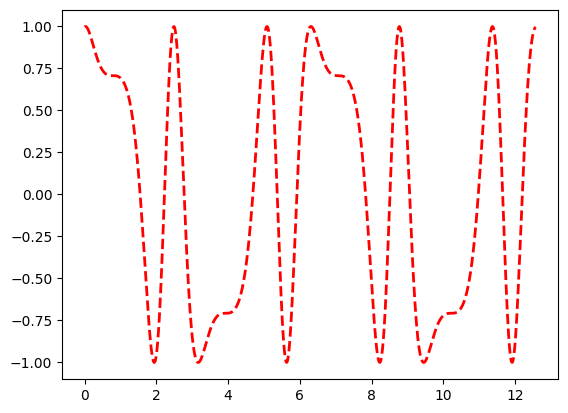

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffbc53da208>

In [1]:
using PyPlot
x = range(0, stop = 4*pi, length=1000)
y = sin.(3*x + 1.5*cos.(2*x))

plot(x, y, color="red", linewidth=2.0, linestyle="--")

In [2]:
using SymPy
x = symbols("x")      # or   @vars x, Sym("x"), or  Sym(:x)
y = sin(10 * pi*x)
y(1), y(2.2), y(123456)

(-1.22464679914735e-15, 4.41120439947682e-15, 6.39055017337619e-11)

In [3]:
using Test

foo(x) = length(x)^2

α = 1

@testset "foo" begin
    @test α == 2-1
    @test π ≈ 3.14 atol=0.01
    @test isapprox(9.81, 10, atol=0.2)
    @test foo("foo") == 9
end

Test Summary: | Pass  Total


foo           |    4      4


Test.DefaultTestSet("foo", Any[], 4, false)

In [0]:
using SpecialMatrices

In [0]:
using ApproxFun

## HomotopyContinuation

Taken from https://www.juliahomotopycontinuation.org/examples/cyclooctane/

In [0]:
using HomotopyContinuation, LinearAlgebra, DynamicPolynomials

c² = 2

@polyvar z[1:3, 1:6]
z_vec = vec(z)[1:17] # the 17 variables in a vector
Z = [zeros(3) z[:,1:5] [z[1,6]; z[2,6]; 0] [√c²; 0; 0]] # the eight points in a matrix

# define the functions for cyclooctane:
F1 = [(Z[:, i] - Z[:, i+1]) ⋅ (Z[:, i] - Z[:, i+1]) - c² for i in 1:7]
F2 = [(Z[:, i] - Z[:, i+2]) ⋅ (Z[:, i] - Z[:, i+2]) - 8c²/3 for i in 1:6]
F3 = (Z[:, 7] - Z[:, 1]) ⋅ (Z[:, 7] - Z[:, 1]) - 8c²/3
F4 = (Z[:, 8] - Z[:, 2]) ⋅ (Z[:, 8] - Z[:, 2]) - 8c²/3
f = [F1; F2; F3; F4]


In [0]:
n = 2 # dimension of the cyclooctane variety
N = 17 # ambient dimension
@polyvar Aᵥ[1:n, 1:N] bᵥ[1:n] # variables for the linear equations
p = [vec(Aᵥ); bᵥ] # parameters
F = [f; Aᵥ * z_vec - bᵥ] # the polynomial system we have to solve

# now we solve one particular instance for A,b complex. we use this as start system
A₀ = randn(ComplexF64, n, N)
b₀ = randn(ComplexF64, n)
p₀ = [vec(A₀); b₀]

F₀ = [subs(Fᵢ, p => [vec(A₀); b₀]) for Fᵢ in F]
complex_result = solve(F₀)
S_p₀ = solutions(complex_result)

In [0]:
tracker = pathtracker(F; parameters=p, generic_parameters=p₀)

# we compute 100 random intersections
data = [randn(n*N+n) for _ in 1:100]
Ω = map(data) do pp
    # We want to store all solutions. Create an empty array.
    S_p = similar(S_p₀, 0)
    for s in S_p₀
        result = track(tracker, s; target_parameters=pp, details=:minimal)
        # check that the tracking was successfull and that we have a real solution
        if is_success(result) && is_real(result)
            # only store the solutions
            push!(S_p, solution(result))
        end
    end
    # return an array of type Array{Float64}
    # (and not Array{ComplexF64})
    real.(S_p)
end
Ω = vcat(Ω...)

In [0]:
using JuMP
using Ipopt
m = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
@variable(m, 0 <= x <= 2 )
@variable(m, 0 <= y <= 30 )
@objective(m, Min, x*x+ 2x*y + y*y )
@constraint(m, x + y >= 1 )
optimize!(m)
println(termination_status(m))
println("| x = ", JuMP.value(x), "| y = ", JuMP.value(y))